We'll try to:
- import the data
- preprocess for a tensorflow model (following time series forecasting tutorial)
- complete the first part of the modelling (up to a simple single-window model)

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [16]:
train_path = '/home/joyvan/cfm/train_dc2020.h5'
df = pd.read_hdf(train_path)
df.head()

df = df.loc[df['stock_id'] == 387 ]
# make a datetime (to improve?)
def mk_dt(df,num):
    df_dt= df['day_id'] + df[(num,'tod')]/1e11
    return df_dt

We'd like to predict the next _source_id_ of trades. We have trades with a time of day, and a day ID for each day. the dataset runs over a whole year.
For one row in the dataset we have the whole time window encapsulated in the ten trades, whose columns are 

```sh
(x,'source_id'), (x,'price'), (x,'qty'), (x,'tod')
```

We're going to isolate these into a reduced dataset and discard the rest, as the OB info will require significantly more preprocessing work to include in any model *note; we have one row of 6 order books for the latest trade (the label trade) and nothing for the rest of the window... so LSTM is not suited there*

In [17]:
for j in range(10):
    df[(j,'dt')] = mk_dt(df,j)
    
df[(4,'dt')].head()

0       238.389311
131     146.569401
1549     96.503795
1769    129.351167
2941     96.398991
Name: (4, dt), dtype: float64

,"(0, source_id)","(0, price)","(0, qty)"
"(0, dt)",,,
2.412781,2,-0.5,0.037279
2.420331,2,-1.0,0.045709
2.431120,2,0.5,0.004255
2.441413,2,2.0,0.046041
2.458112,4,1.0,0.036900


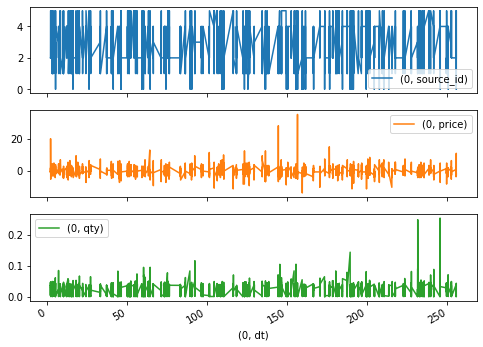

In [24]:
_cols_sid= [(0,'source_id'),(1,'source_id'),(2,'source_id'),(3,'source_id'),(4,'source_id'),(5,'source_id'),(6,'source_id'),(7,'source_id'),(8,'source_id'),(9,'source_id')]
_cols_price=[(0,'price'),(1,'price'),(2,'price'),(3,'price'),(4,'price'),(5,'price'),(6,'price'),(7,'price'),(8,'price'),(9,'price')]
_cols_qty=[(0,'qty'),(1,'qty'),(2,'qty'),(3,'qty'),(4,'qty'),(5,'qty'),(6,'qty'),(7,'qty'),(8,'qty'),(9,'qty')] 
_cols_tod=[(0,'tod'),(1,'tod'),(2,'tod'),(3,'tod'),(4,'tod'),(5,'tod'),(6,'tod'),(7,'tod'),(8,'tod'),(9,'tod')]


#def mk_ds()
plot_features=df[[_cols_sid[0],_cols_price[0],_cols_qty[0]]]
plot_features.index = df[(0,'dt')].sort_values()
_ = plot_features.plot(subplots=True)
plot_features.head()